In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from main import disk_size, head, direction, random_request
from algorithm.scan import SCAN
from algorithm.cscan import CSCAN
from algorithm.clook import CLOOK

In [17]:
# Store averages
avg_seek_time_SCAN = []  
avg_seek_time_CSCAN = [] 
avg_seek_time_CLOOK = []

# Store worst case
worst_seek_time_SCAN = []  
worst_seek_time_CSCAN = [] 
worst_seek_time_CLOOK = []






for size in random_request:
    # Generate 'size' random requests
    arr = [random.randint(0, disk_size-1) for _ in range(size)]

    print(f"\nRequest Size: {size}")
    print('----------------')
    print("\nSCAN algorithm")
    scan_avg, scan_worst = SCAN(disk_size, arr, head, direction)

    # Store all average in avg_seek_time_SCAN
    avg_seek_time_SCAN.append(scan_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_SCAN.append(scan_worst)

    

    print("\n\nC-SCAN algorithm")
    cscan_avg, cscan_worst = CSCAN(disk_size, arr, head)

     # Store all average in avg_seek_time_CSCAN
    avg_seek_time_CSCAN.append(cscan_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_CSCAN.append(cscan_worst)



    print("\n\nC-LOOK algorithm")
    clook_avg, clook_worst = CLOOK(arr, head)

    # Store all average in avg_seek_time_CLOOK
    avg_seek_time_CLOOK.append(clook_avg)
    # Store all worst seek time in worst_seek_time_SCAN
    worst_seek_time_CLOOK.append(clook_worst)

    print()
    print("===========================================================================================================================================================================================================")



Request Size: 10
----------------

SCAN algorithm
Total number of seek operations = 190
Average seek time = 17.272727272727273
Worst-case seek time = 86
Seek Sequence is:  38, 10, 0, 86, 108, 113, 116, 124, 126, 137, 140, 

C-SCAN algorithm
Total number of seek operations = 386
Average seek time = 32.166666666666664
Worst-case seek time = 199
Seek Sequence is:  86, 108, 113, 116, 124, 126, 137, 140, 199, 0, 10, 38, 

C-LOOK algorithm
Total number of seek operations = 248
Average seek time = 24.8
Worst-case seek time = 130
Seek Sequence is:  86, 108, 113, 116, 124, 126, 137, 140, 10, 38, 

Request Size: 20
----------------

SCAN algorithm
Total number of seek operations = 242
Average seek time = 11.523809523809524
Worst-case seek time = 53
Seek Sequence is:  39, 32, 31, 22, 7, 2, 0, 53, 75, 101, 107, 111, 117, 132, 134, 142, 150, 152, 157, 162, 192, 

C-SCAN algorithm
Total number of seek operations = 387
Average seek time = 17.59090909090909
Worst-case seek time = 199
Seek Sequence is

In [3]:
print("Average Seek Time\n")
print("SCAN   ", avg_seek_time_SCAN)
print("CSCAN  ", avg_seek_time_CSCAN)
print("CLOOK  ", avg_seek_time_CLOOK)

print("\nWorst Seek Time\n")
print("SCAN   ", worst_seek_time_SCAN)
print("CSCAN  ", worst_seek_time_CSCAN)
print("CLOOK  ", worst_seek_time_CLOOK)


Average Seek Time

SCAN    [22.363636363636363, 12.45, 4.823529411764706, 2.48]
CSCAN   [32.416666666666664, 18.571428571428573, 7.519230769230769, 3.9306930693069306]
CLOOK   [38.1, 17.68421052631579, 7.14, 3.98989898989899]

Worst Seek Time

SCAN    [54, 53, 54, 52]
CSCAN   [199, 199, 199, 199]
CLOOK   [195, 172, 182, 198]


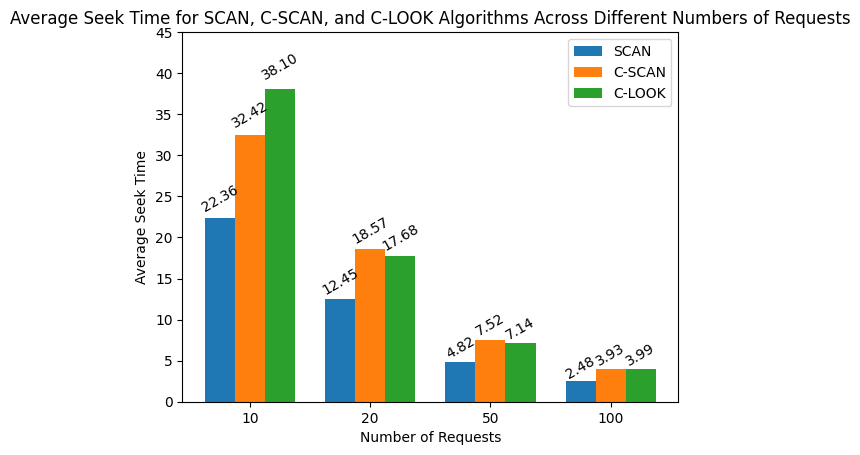

In [4]:
# Set up the bar chart
labels = ['10', '20', '50', '100']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, avg_seek_time_SCAN, width, label='SCAN')
rects2 = ax.bar(x, avg_seek_time_CSCAN, width, label='C-SCAN')
rects3 = ax.bar(x + width, avg_seek_time_CLOOK, width, label='C-LOOK')


# Labelling
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Average Seek Time')
ax.set_title('Average Seek Time for SCAN, C-SCAN, and C-LOOK Algorithms Across Different Numbers of Requests')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


# Set the y-axis limit
ax.set_ylim(0, 45)


# Function to add label on bar chart
# Function to add label on bar chart
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02*height,
                '%.2f' % float(height),
                ha='center', va='bottom', rotation=30)

# Call function to add label
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


plt.show()

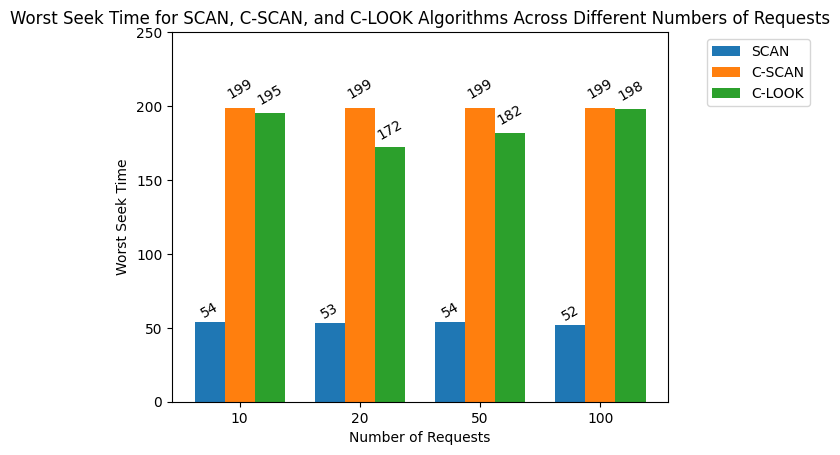

In [5]:
# Set up the bar chart
labels = ['10', '20', '50', '100']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of bars


fig, ax = plt.subplots()
rects1 = ax.bar(x - width, worst_seek_time_SCAN, width, label='SCAN')
rects2 = ax.bar(x, worst_seek_time_CSCAN, width, label='C-SCAN')
rects3 = ax.bar(x + width, worst_seek_time_CLOOK, width, label='C-LOOK')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Number of Requests')
ax.set_ylabel('Worst Seek Time')
ax.set_title('Worst Seek Time for SCAN, C-SCAN, and C-LOOK Algorithms Across Different Numbers of Requests')
ax.set_xticks(x)
ax.set_xticklabels(labels)


# Legend placement
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))


# Set the y-axis limit
ax.set_ylim(0, 250)

def autolabel2(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.02*height,
                '%.f' % int(height),
                ha='center', va='bottom', rotation=30)


# Call function to add label
autolabel2(rects1)
autolabel2(rects2)
autolabel2(rects3)


plt.show()